In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import operator
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [55]:
os.chdir("D:/GreyAtom/Datasets")

df = pd.read_csv("wbc.csv")

In [56]:
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

In [57]:
df = df.drop(["Unnamed: 32"], axis = 1)

In [58]:
df = df.drop(["id"], axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [60]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [61]:
corr = df.corr()
corr["diagnosis"]

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

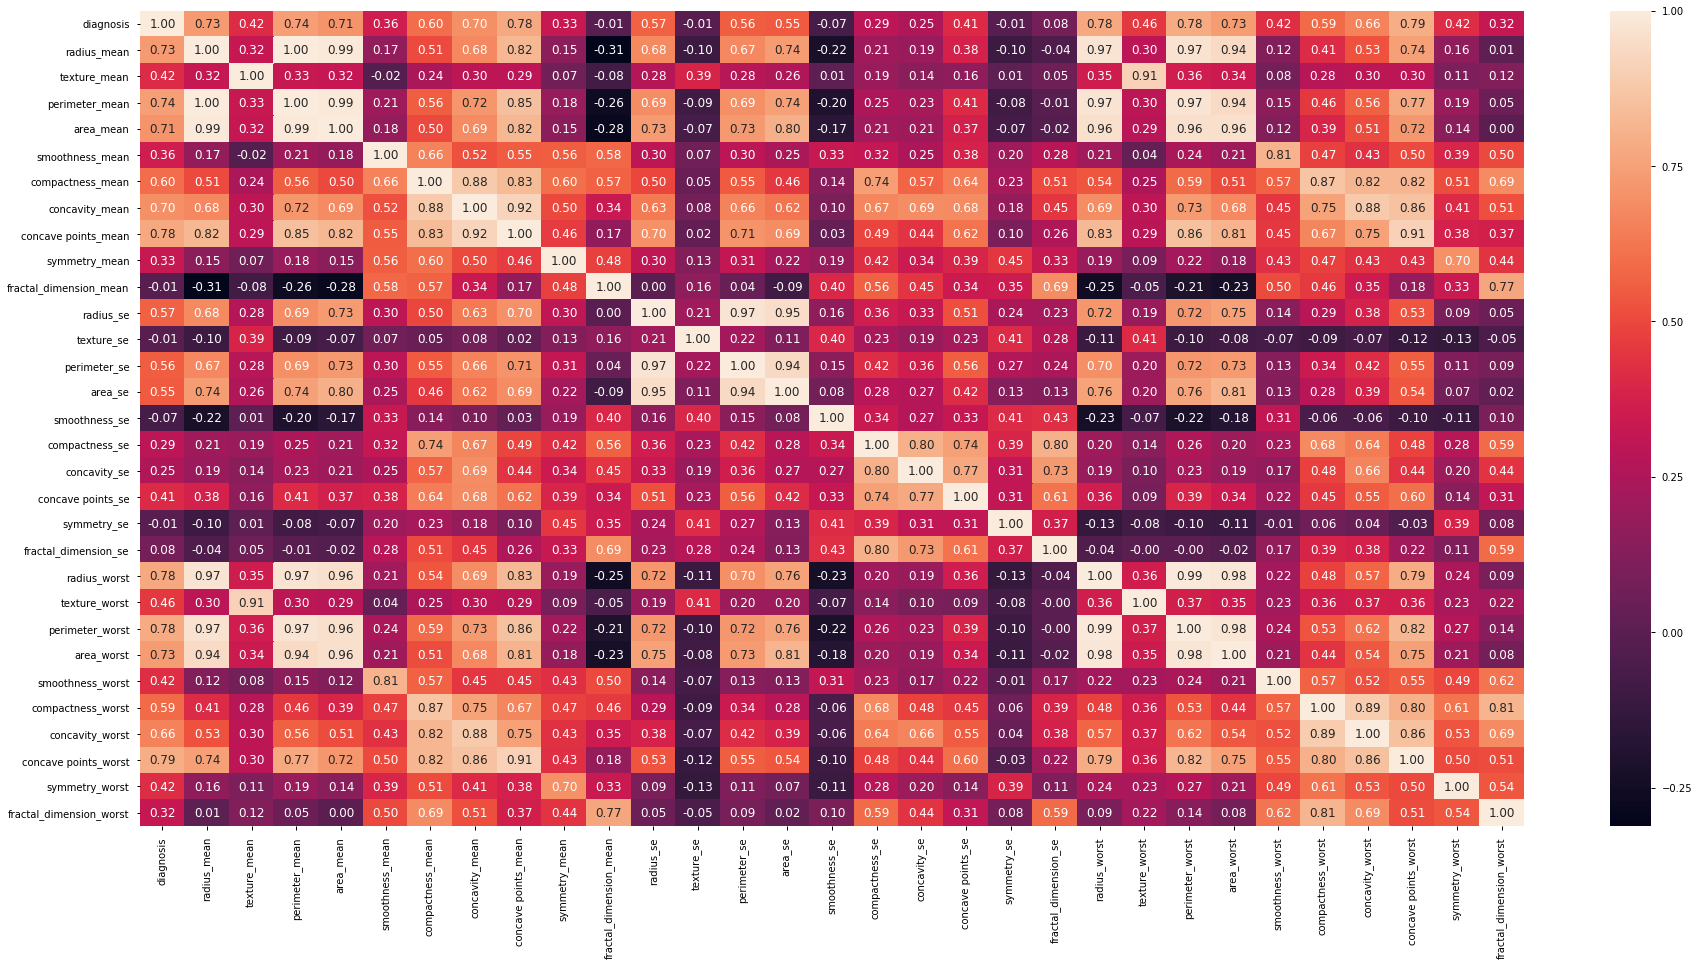

In [62]:
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth":4.5})
plot.figure(figsize = (31, 15))
a = sns.heatmap(corr, annot = True, fmt = ".2f")

In [66]:
X = df.drop(["diagnosis"], axis = 1)
y = df["diagnosis"]

In [67]:
test = SelectKBest(score_func=chi2, k=8)
fit = test.fit(X, y)

features = list(X.columns)
scores = list(fit.scores_)

dictionary = dict(zip(features, scores))
sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)

[('concave points_mean', 52.40574268659541),
 ('concave points_worst', 46.34164769348753),
 ('concavity_mean', 46.1863953907958),
 ('area_worst', 35.04388198069958),
 ('perimeter_worst', 34.43809072790432),
 ('radius_worst', 34.12493658309718),
 ('concavity_worst', 31.563031210039213),
 ('area_mean', 29.328593787242877),
 ('perimeter_mean', 26.52890230130619),
 ('radius_mean', 24.897292900004274),
 ('compactness_worst', 20.99254137508906),
 ('compactness_mean', 20.353175930274933),
 ('area_se', 19.676975044535613),
 ('radius_se', 17.32412784739099),
 ('perimeter_se', 16.04434421384653),
 ('texture_worst', 8.741627544175365),
 ('texture_mean', 6.394071407340187),
 ('concave points_se', 5.7819958965396605),
 ('smoothness_worst', 5.675733031400547),
 ('symmetry_worst', 5.560093100895955),
 ('compactness_se', 5.056762306280253),
 ('fractal_dimension_worst', 4.410125241632837),
 ('symmetry_mean', 3.1331303859863238),
 ('smoothness_mean', 2.9819003982965864),
 ('concavity_se', 2.638175794894

In [116]:
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 8
Selected Features: [False False False False False False  True  True False  True False False
 False False False False False False False False  True  True  True  True
 False False False  True False False]
Feature Ranking: [13 11  7  3 19 18  1  1 21  1  4 16  8 10 20  6 17 23 15 12  1  1  1  1
 14  5  2  1  9 22]


In [117]:
features = list(X.columns)
scores = list(fit.support_)
import operator
d = {}
d = dict(zip(features, scores))
sorted(d.items(), key=operator.itemgetter(1))

[('radius_mean', False),
 ('texture_mean', False),
 ('perimeter_mean', False),
 ('area_mean', False),
 ('smoothness_mean', False),
 ('compactness_mean', False),
 ('symmetry_mean', False),
 ('radius_se', False),
 ('texture_se', False),
 ('perimeter_se', False),
 ('area_se', False),
 ('smoothness_se', False),
 ('compactness_se', False),
 ('concavity_se', False),
 ('concave points_se', False),
 ('symmetry_se', False),
 ('fractal_dimension_se', False),
 ('smoothness_worst', False),
 ('compactness_worst', False),
 ('concavity_worst', False),
 ('symmetry_worst', False),
 ('fractal_dimension_worst', False),
 ('concavity_mean', True),
 ('concave points_mean', True),
 ('fractal_dimension_mean', True),
 ('radius_worst', True),
 ('texture_worst', True),
 ('perimeter_worst', True),
 ('area_worst', True),
 ('concave points_worst', True)]

In [118]:
feature_list = []
for x in d:
    if d[x] == True:
        feature_list.append(x)

In [119]:
X_model = df[feature_list]
y_model = df["diagnosis"]

logreg = LogisticRegression()
cv_log_ref = cross_val_score(logreg, X_model, y_model, cv = 5)
cv_log_ref.min()

0.9391304347826087